In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from scipy import stats

In [3]:
df=pd.read_csv("sample.csv",index_col=0)
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
1259895,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1453574,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
602282,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
480648,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
201010,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [4]:
df.shape

(192994, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192994 entries, 1259895 to 1596827
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   po_nbr                   192994 non-null  int64  
 1   present_inv              192994 non-null  float64
 2   lead_time                181317 non-null  float64
 3   total_whpk_qty           192994 non-null  float64
 4   fcst_3_mo                192994 non-null  float64
 5   fcst_6_mo                192994 non-null  float64
 6   fcst_9_mo                192994 non-null  float64
 7   sls_1_mo                 192994 non-null  float64
 8   sls_3_mo                 192994 non-null  float64
 9   sls_6_mo                 192994 non-null  float64
 10  sls_9_mo                 192994 non-null  float64
 11  minimum_stock_qty        192994 non-null  float64
 12  identified_defect        192994 non-null  object 
 13  spare_parts_overdue      192994 non-null  float64
 1

In [6]:
df.isnull().sum()

po_nbr                         0
present_inv                    0
lead_time                  11677
total_whpk_qty                 0
fcst_3_mo                      0
fcst_6_mo                      0
fcst_9_mo                      0
sls_1_mo                       0
sls_3_mo                       0
sls_6_mo                       0
sls_9_mo                       0
minimum_stock_qty              0
identified_defect              0
spare_parts_overdue            0
avg_ratings_6_mo               0
avg_ratings_12_mo              0
stock_overdue                  0
internal_risk1                 0
internal_risk2                 0
production_quality_risk        0
pdt_recsys                     0
internal_risk3                 0
out_of_stock                   0
dtype: int64

In [7]:
len(df)

192994

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,sls_9_mo,minimum_stock_qty,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue
count,1.929940e+05,1.929940e+05,181317.000000,192994.000000,1.929940e+05,1.929940e+05,1.929940e+05,192994.000000,1.929940e+05,1.929940e+05,1.929940e+05,192994.000000,192994.000000,192994.000000,192994.000000,192994.000000
mean,2.256478e+06,4.071565e+02,7.857542,49.897406,1.916102e+02,3.689133e+02,5.411289e+02,60.369006,1.896981e+02,3.686664e+02,5.642267e+02,56.626481,2.907225,-6.914761,-6.504727,0.722162
std,7.644566e+05,7.308631e+03,6.995806,1669.073170,5.743923e+03,1.137062e+04,1.694249e+04,2115.744453,6.265479e+03,1.163180e+04,1.800806e+04,1612.953221,411.985042,26.622844,25.952688,38.620386
min,1.045867e+06,-1.349100e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.594203e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.630000,0.660000,0.000000
50%,2.072349e+06,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.820000,0.810000,0.000000
75%,3.041604e+06,8.000000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.500000e+01,3.100000e+01,4.700000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.526980e+06,1.370327e+06,52.000000,328060.000000,1.218328e+06,2.461360e+06,3.777304e+06,366191.000000,1.084974e+06,2.146625e+06,3.197338e+06,311423.000000,137625.000000,1.000000,1.000000,6544.000000


In [12]:
df.nunique()

po_nbr                     192994
present_inv                  5612
lead_time                      32
total_whpk_qty               1812
fcst_3_mo                    2857
fcst_6_mo                    3954
fcst_9_mo                    4793
sls_1_mo                     2012
sls_3_mo                     3631
sls_6_mo                     5111
sls_9_mo                     6207
minimum_stock_qty            1984
identified_defect               2
spare_parts_overdue           312
avg_ratings_6_mo              102
avg_ratings_12_mo             102
stock_overdue                 236
internal_risk1                  2
internal_risk2                  2
production_quality_risk         2
pdt_recsys                      2
internal_risk3                  2
out_of_stock                    2
dtype: int64

In [13]:
df.out_of_stock.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df.out_of_stock.value_counts()

No     191582
Yes      1412
Name: out_of_stock, dtype: int64

In [16]:
df.out_of_stock.nunique()

2

In [17]:
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
1259895,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1453574,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
602282,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
480648,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
201010,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [21]:
df.reset_index(drop=True,inplace=True)
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
0,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
2,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
3,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
4,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [22]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

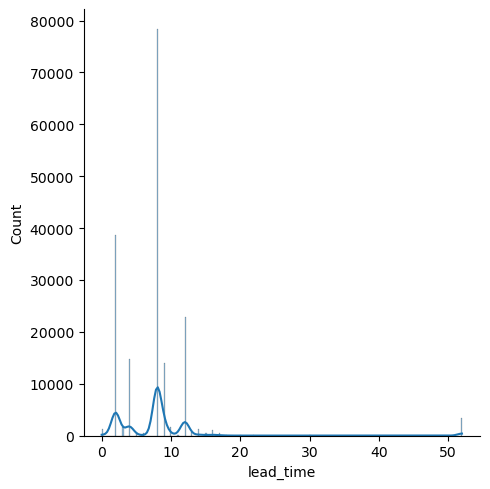

In [26]:
sns.displot(df.lead_time,kde=True)